<a href="https://colab.research.google.com/github/aboutdouglas/Processamento_Linguagem_Natural/blob/main/N_granas%2C_TF_IDF_e_uso_de_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
imdb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pós Graduação/Bases/IMDB_Dataset.csv')

filmes = pd.DataFrame(imdb)

print(filmes.head())

Mounted at /content/drive
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
print(filmes.isnull().sum())

review       0
sentiment    0
dtype: int64


In [ ]:
print(filmes['sentiment'].value_counts())

positive    25000
negative    25000
Name: sentiment, dtype: int64


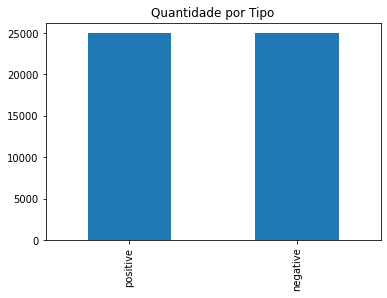

In [ ]:
filmes['sentiment'].value_counts().plot.bar(title='Quantidade por Tipo',rot=90)
plt.show()

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

exemplo = imdb['review'].values[0]
print(exemplo)
print(len(exemplo.split()))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [ ]:
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

stopwords = nltk.corpus.stopwords.words('english')
ponctuations = list(string.punctuation)
TAMANHO_MINIMO = 1
IGNORAR = ['....', '...', 'br', '.so', 'll', '']
stemmer = SnowballStemmer('english')

nltk.download('punkt')

def prepara(texto):
    palavras = [i for i in word_tokenize(texto, language='english') if i not in string.punctuation]
    palavras = [i for i in palavras if i not in stopwords]
    palavras = [i for i in palavras if len(i) > TAMANHO_MINIMO]
    palavras = [i for i in palavras if i not in IGNORAR]
    palavras = [stemmer.stem(i) for i in palavras]
    return palavras

exemplo_preparado = prepara(exemplo)
print(exemplo_preparado)
print(len(exemplo_preparado))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['one', 'review', 'mention', 'watch', 'oz', 'episod', 'll', 'hook', 'they', 'right', 'exact', 'happen', 'me.', 'the', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'this', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'it', 'hardcor', 'classic', 'use', 'word.', 'it', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'it', 'focus', 'main', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', '..', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away.', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'would', "n't", 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'cha

In [ ]:
%%time
imdb['review2'] = imdb['review'].apply(prepara)
imdb['review2'] = imdb['review2'].apply(''.join)
print(imdb.head())


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                             review2  
0  onereviewmentionwatchozepisodllhooktheyrightex...  
1  wonderlittlproductthefilmtechniquunassuming-ol...  
2  thoughtwonderwayspendtimehotsummerweekendsitai...  
3  basic'sfamililittlboyjakethink'szombiclosetpar...  
4  pettermattei's``lovetimemoney''visualstunfilmw...  
CPU times: user 3min 38s, sys: 1.02 s, total: 3min 39s
Wall time: 3min 47s


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

X_train, X_test, y_train, y_test = train_test_split(imdb['review2'], imdb['sentiment'], test_size=0.2, random_state=0)

print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,1))
bow_X_train = cv.fit_transform(X_train)
bow_X_test = cv.transform(X_test)
print('bow_X_train shape:', bow_X_train.shape)
print('bow_X_test shape:', bow_X_test.shape)

lb = LabelBinarizer()
ohe_y_train = lb.fit_transform(y_train)
ohe_y_test = lb.fit_transform(y_test)
print('ohe_y_train shape:', ohe_y_train.shape)
print('ohe_y_test shape:', ohe_y_test.shape)

X_train shape: (40000,)
y_train shape: (40000,)
X_test shape: (10000,)
y_test shape: (10000,)
bow_X_train shape: (40000, 381801)
bow_X_test shape: (10000, 381801)
ohe_y_train shape: (40000, 1)
ohe_y_test shape: (10000, 1)


Regressão Logística

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr.fit(bow_X_train, ohe_y_train.ravel())
print(lr)

LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
y_predict = lr.predict(bow_X_test)
print("LogReg Score:", accuracy_score(ohe_y_test, y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive', 'Negative']))

LogReg Score: 0.5332
              precision    recall  f1-score   support

    Positive       0.66      0.15      0.25      5035
    Negative       0.52      0.92      0.66      4965

    accuracy                           0.53     10000
   macro avg       0.59      0.54      0.45     10000
weighted avg       0.59      0.53      0.45     10000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


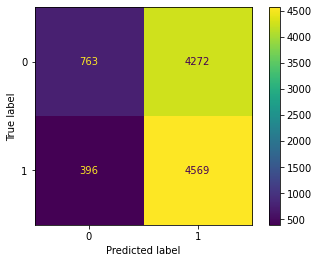

In [ ]:
plot_confusion_matrix(lr, bow_X_test, ohe_y_test, values_format='d');
plt.show()

Classificador SGD

In [ ]:
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(loss='hinge', random_state=42)
svm.fit(bow_X_train,ohe_y_train.ravel())

SGDClassifier(random_state=42)

In [ ]:
y_predict = svm.predict(bow_X_test)
print("SVM Score:", accuracy_score(ohe_y_test, y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive', 'Negative']))

SVM Score: 0.5306
              precision    recall  f1-score   support

    Positive       0.67      0.13      0.22      5035
    Negative       0.52      0.93      0.66      4965

    accuracy                           0.53     10000
   macro avg       0.59      0.53      0.44     10000
weighted avg       0.59      0.53      0.44     10000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


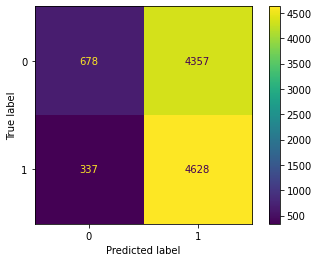

In [ ]:
plot_confusion_matrix(svm, bow_X_test, ohe_y_test, values_format='d');
plt.show()